<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11- matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Using cars for hire dataset:
url= 'https://data.cityofnewyork.us/resource/8wbx-tsch.csv'
df = pd.read_csv(url)
df.head()


,active,vehicle_license_number,name,license_type,expiration_date,permit_license_number,dmv_license_plate_number,vehicle_vin_number,wheelchair_accessible,certification_date,...,base_name,base_type,veh,base_telephone_number,website,base_address,reason,order_date,last_date_updated,last_time_updated
0,YES,6032728,"UPPAL, ARSHDEEP",FOR HIRE VEHICLE,2026-06-30T00:00:00.000,AA005,T117661C,KMHLM4AJ2NU023825,PILOT,NaN,...,TEL AVIV CAR & LIMOUSINE SERVICE INC.,LIVERY,HYB,(800)222-9888,NaN,43-23 35 STREET LIC NY 11101,G,NaN,2025-04-14T00:00:00.000,13:25
1,YES,5953896,"ELIHORI,ASIM,SALIH",FOR HIRE VEHICLE,2025-11-07T00:00:00.000,AA006,T790912C,4T4BF1FK4FR457564,NaN,2019-11-07T00:00:00.000,...,ZYNC INC,BLACK-CAR,NaN,(718)482-1818,NaN,12-04 44 AVENUE LIC NY 11101,G,NaN,2025-04-14T00:00:00.000,13:25
2,YES,5729129,"LORENZO,MARTIN",FOR HIRE VEHICLE,2026-10-12T00:00:00.000,AA010,T708186C,4T1K31AK2PU059202,NaN,2023-11-17T00:00:00.000,...,CURB TRANSPORTATION SERVICES LLC.,LIVERY,NaN,(718)222-0600,WWW.CURBTRANSPORTATION.COM,11 - 11 34 AVENUE LIC NY 11106,G,NaN,2025-04-14T00:00:00.000,13:25
3,YES,6035913,"GULYAMOV,,AMINJON",FOR HIRE VEHICLE,2026-06-30T00:00:00.000,AA013,T118710C,JTDKN3DU5D0352182,PILOT,NaN,...,"ALLSTATE PRIVATE CAR & LIMO,INC",BLACK-CAR,HYB,(212)741-1562,NaN,241 37 STREET STE#1-4-B443 BROOKLYN NY 11232,G,NaN,2025-04-14T00:00:00.000,13:25
4,YES,6033635,"KHAN,DEWAN,M",FOR HIRE VEHICLE,2026-06-30T00:00:00.000,AA017,T137988C,JTDZN3EU6GJ049360,PILOT,NaN,...,"SOUTH BRONX TRANSPORTATION,INC.",BLACK-CAR,HYB,(347)590-7005,WWW.SOUTHBRONXTRANS.COM,250 BROOK AVENUE BRONX NY 10454,G,NaN,2025-04-14T00:00:00.000,13:25


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   active                    1000 non-null   object 
 1   vehicle_license_number    1000 non-null   object 
 2   name                      1000 non-null   object 
 3   license_type              1000 non-null   object 
 4   expiration_date           1000 non-null   object 
 5   permit_license_number     1000 non-null   object 
 6   dmv_license_plate_number  1000 non-null   object 
 7   vehicle_vin_number        1000 non-null   object 
 8   wheelchair_accessible     450 non-null    object 
 9   certification_date        562 non-null    object 
 10  hack_up_date              563 non-null    object 
 11  vehicle_year              1000 non-null   int64  
 12  base_number               1000 non-null   object 
 13  base_name                 1000 non-null   object 
 14  base_type

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [ ]:
#Only few columns are of interest: permit_license_number, base-type, vheicle_year, veh
#We will first subset the dataframe into a small subset:
df1 = df[['permit_license_number', 'base_type', 'vehicle_year', 'veh']].set_index('permit_license_number')
df1.head()

,base_type,vehicle_year,veh
permit_license_number,,,
AA005,LIVERY,2022,HYB
AA006,BLACK-CAR,2015,NaN
AA010,LIVERY,2023,NaN
AA013,BLACK-CAR,2013,HYB
AA017,BLACK-CAR,2016,HYB


**We Will also check for any missing values:**

In [ ]:
df1.isnull().sum() #only the veh column has missing values. Since veh defines hybrid vehicle indicators, we will assume all the missing values to be non-hybrid vehicles

#We will rename veh column to car_type:
df1 = df1.rename(columns={'veh':'car_type'})

#We will fill in the NAs with ICE stands for Internal Combustion Engine cars (gas cars)
df1['car_type'] = df1['car_type'].fillna('ICE')

df1.head()

,base_type,vehicle_year,car_type
permit_license_number,,,
AA005,LIVERY,2022,HYB
AA006,BLACK-CAR,2015,ICE
AA010,LIVERY,2023,ICE
AA013,BLACK-CAR,2013,HYB
AA017,BLACK-CAR,2016,HYB


In [ ]:
#Checking the types of data available in each column
df1.value_counts(['base_type', 'car_type'])

#There is one typo named 'NON'. We will fix it as ICE
df1['car_type'] = df1['car_type'].replace('NON', 'ICE')

#Double checking:
df1.value_counts(['base_type', 'car_type']) #Fixed
#HYB = hybrid; ICE = gas car; WAV= wheelchair available vehicle; BEV = battery electric vehicle

base_type  car_type
BLACK-CAR  HYB         544
           ICE         271
LIVERY     HYB         107
           ICE          63
BLACK-CAR  WAV          11
LIVERY     WAV           2
BLACK-CAR  BEV           1
LIVERY     BEV           1
Name: count, dtype: int64

In [ ]:
#Also checking the range of year:
print(f'Vehicle year range from {df1["vehicle_year"].min()} to {df1["vehicle_year"].max()}')
print(f'The total number of cars is {len(df1)}')

Vehicle year range from 2004 to 2025
The total number of cars is 1000


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties.

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



Part 1:
Histogram and barplot

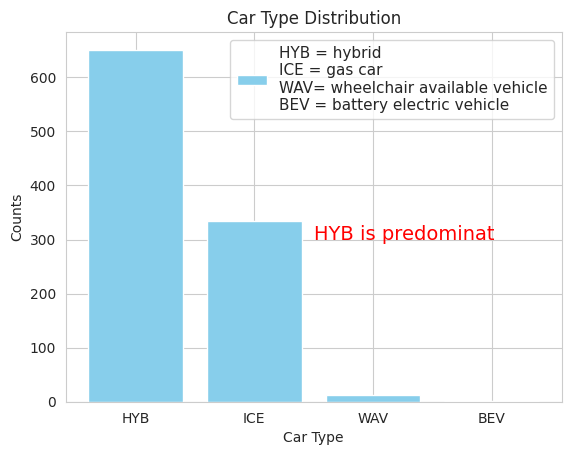

In [ ]:
plt.bar(df1['car_type'].value_counts().index, df1['car_type'].value_counts().values, color = 'skyblue')
plt.xlabel('Car Type')
plt.ylabel('Counts')
plt.title('Car Type Distribution')
plt.legend(['HYB = hybrid\nICE = gas car\nWAV= wheelchair available vehicle\nBEV = battery electric vehicle'], fontsize=11)
plt.text(1.5, 300, 'HYB is predominat', color='red', fontsize=14)
plt.show()

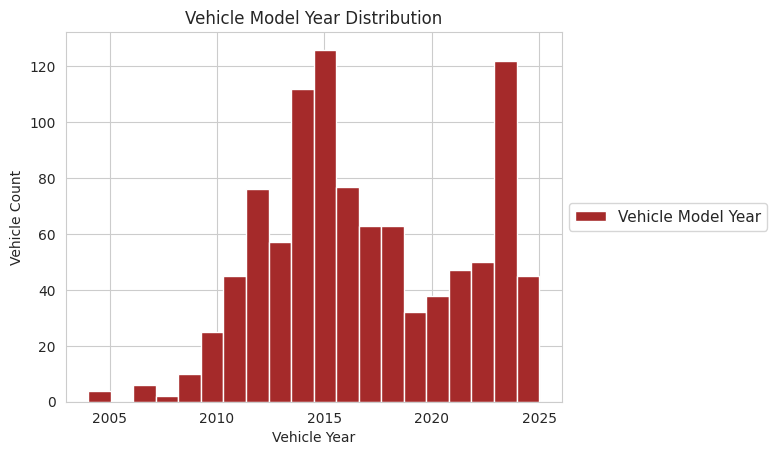

In [ ]:
# histogram for the vehicle years:
plt.hist(df1['vehicle_year'], bins=20, color = 'brown')
plt.xlabel('Vehicle Year')
plt.ylabel('Vehicle Count')
plt.title('Vehicle Model Year Distribution')
plt.legend(['Vehicle Model Year'], fontsize=11, loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

Part 2:
Seaborn

I will re-create the count plot in seaborn catplot

In [ ]:
df1

,base_type,vehicle_year,car_type
permit_license_number,,,
AA005,LIVERY,2022,HYB
AA006,BLACK-CAR,2015,ICE
AA010,LIVERY,2023,ICE
AA013,BLACK-CAR,2013,HYB
AA017,BLACK-CAR,2016,HYB
...,...,...,...
AF635,BLACK-CAR,2016,ICE
AF640,BLACK-CAR,2014,HYB
AF641,BLACK-CAR,2016,HYB


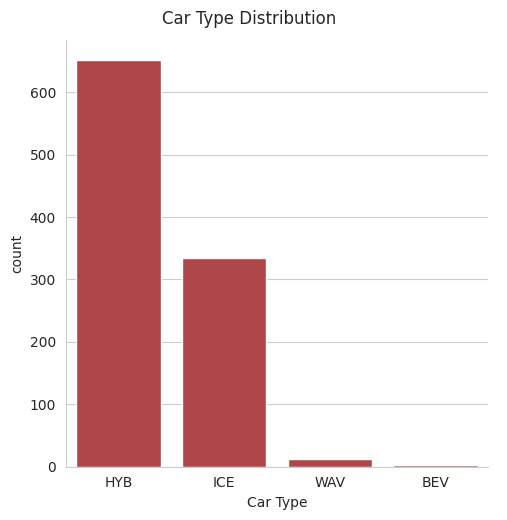

In [ ]:
import seaborn as sns
#This is to arrange the order of the columns being displayed
order = ['HYB','ICE','WAV','BEV']

#Creating a catplot which is equavient as the count plot
g = sns.catplot(x = 'car_type',
            data = df1,
            kind = 'count',
            order = order)

#Changing the background style
sns.set_style('whitegrid')

#changing color pallete for the bars
sns.set_palette('RdBu')

#Label the x axis
plt.xlabel('Car Type')

#Lab the title
g.fig.suptitle('Car Type Distribution', y=1.03)

plt.show()

**Fig.1)** The count plot above is counting the number of vehicles types that are for hire at NYC that are registered. The number of hybrid vehicle is the predomainat type. This is probably due to its fuel saving and covinence in re-fueling.

Re-creating the second plot: Histogram

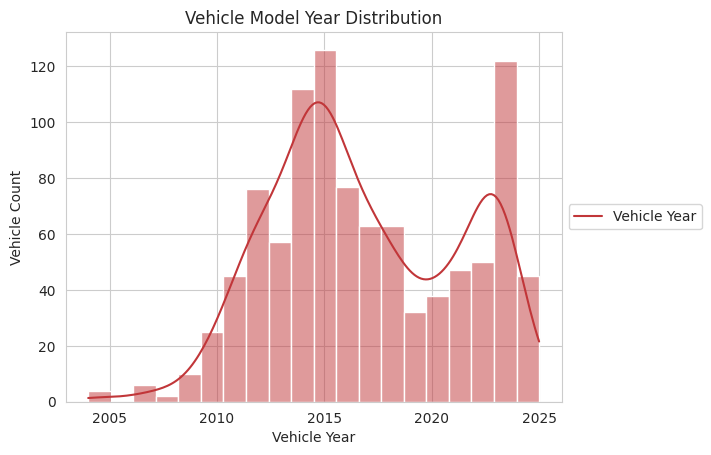

In [ ]:
#Constructing histogram in seaborn
sns.histplot(df1['vehicle_year'], bins=20, kde=True)

#Adding aesthetics and labels to the plot
plt.xlabel('Vehicle Year')
plt.ylabel('Vehicle Count')
plt.title('Vehicle Model Year Distribution')
plt.legend(['Vehicle Year'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

**Fig.2)** The histogram above is showcasing the vehicle year distribution. The vehicle model years range from 2005 to 2025. Majority of the cars in the current for hire fleet are still from the year 2015.

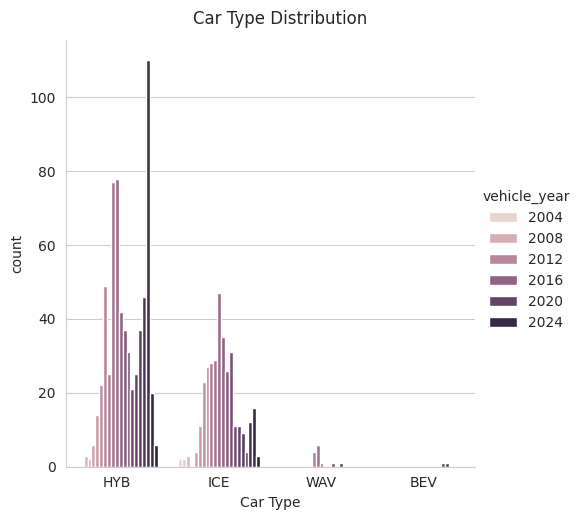

In [ ]:
order = ['HYB','ICE','WAV','BEV']

#Creating a catplot which is equavient as the count plot
g = sns.catplot(x = 'car_type',
            data = df1,
            kind = 'count',
            order = order,
            hue='vehicle_year')

#Changing the background style
sns.set_style('whitegrid')

#Label the x axis
plt.xlabel('Car Type')

#Lab the title
g.fig.suptitle('Car Type Distribution', y=1.03)

plt.show()

**Fig.3)** This is the modified version of the count plot that separates the vehicles by year-made.

**Part 3**
Matplotlib offers basic functions and options to create different types of basic plots while seaborn offers a lot of type sof plots such as violin plots and heatmaps. There are a lot more asethetic options to choose from to make addition accent on the plots.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

The NYC cars registered for hire are mainy consists of hybrid vehicles. In addition, the hybrid model years of these cars are predomainatly from 2020 and up, indicating that more newer cars offer the option of hybrid. On the other hand, EV cars are still relative low and new in the car for hire market. This could be due to issues with the duration of re-fueling the vehicle and limited locations for charging.